<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_sku_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam


In [2]:

import pandas as pd
df_org = pd.read_excel('/content/Центральный федеральный округ_X5_Дискаунтер_Сыр полутвёрдый.xlsx')

In [3]:
# df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1)).dt.to_period('M')
df_org

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL
0,1,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,757.015534,68.88,0.971298,1.486557e-04
1,2,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,767.246528,2.88,0.491319,6.279892e-06
2,3,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,999.458333,0.24,0.000000,6.005747e-07
3,1,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3024.421769,14.70,0.777143,2.575605e-05
4,2,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3118.870635,12.60,0.726190,2.190801e-05
...,...,...,...,...,...,...,...,...,...,...
2080,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,2.220258e-02
2081,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,5.385147e-03
2082,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,2.123730e-02
2083,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,1.545385e-02


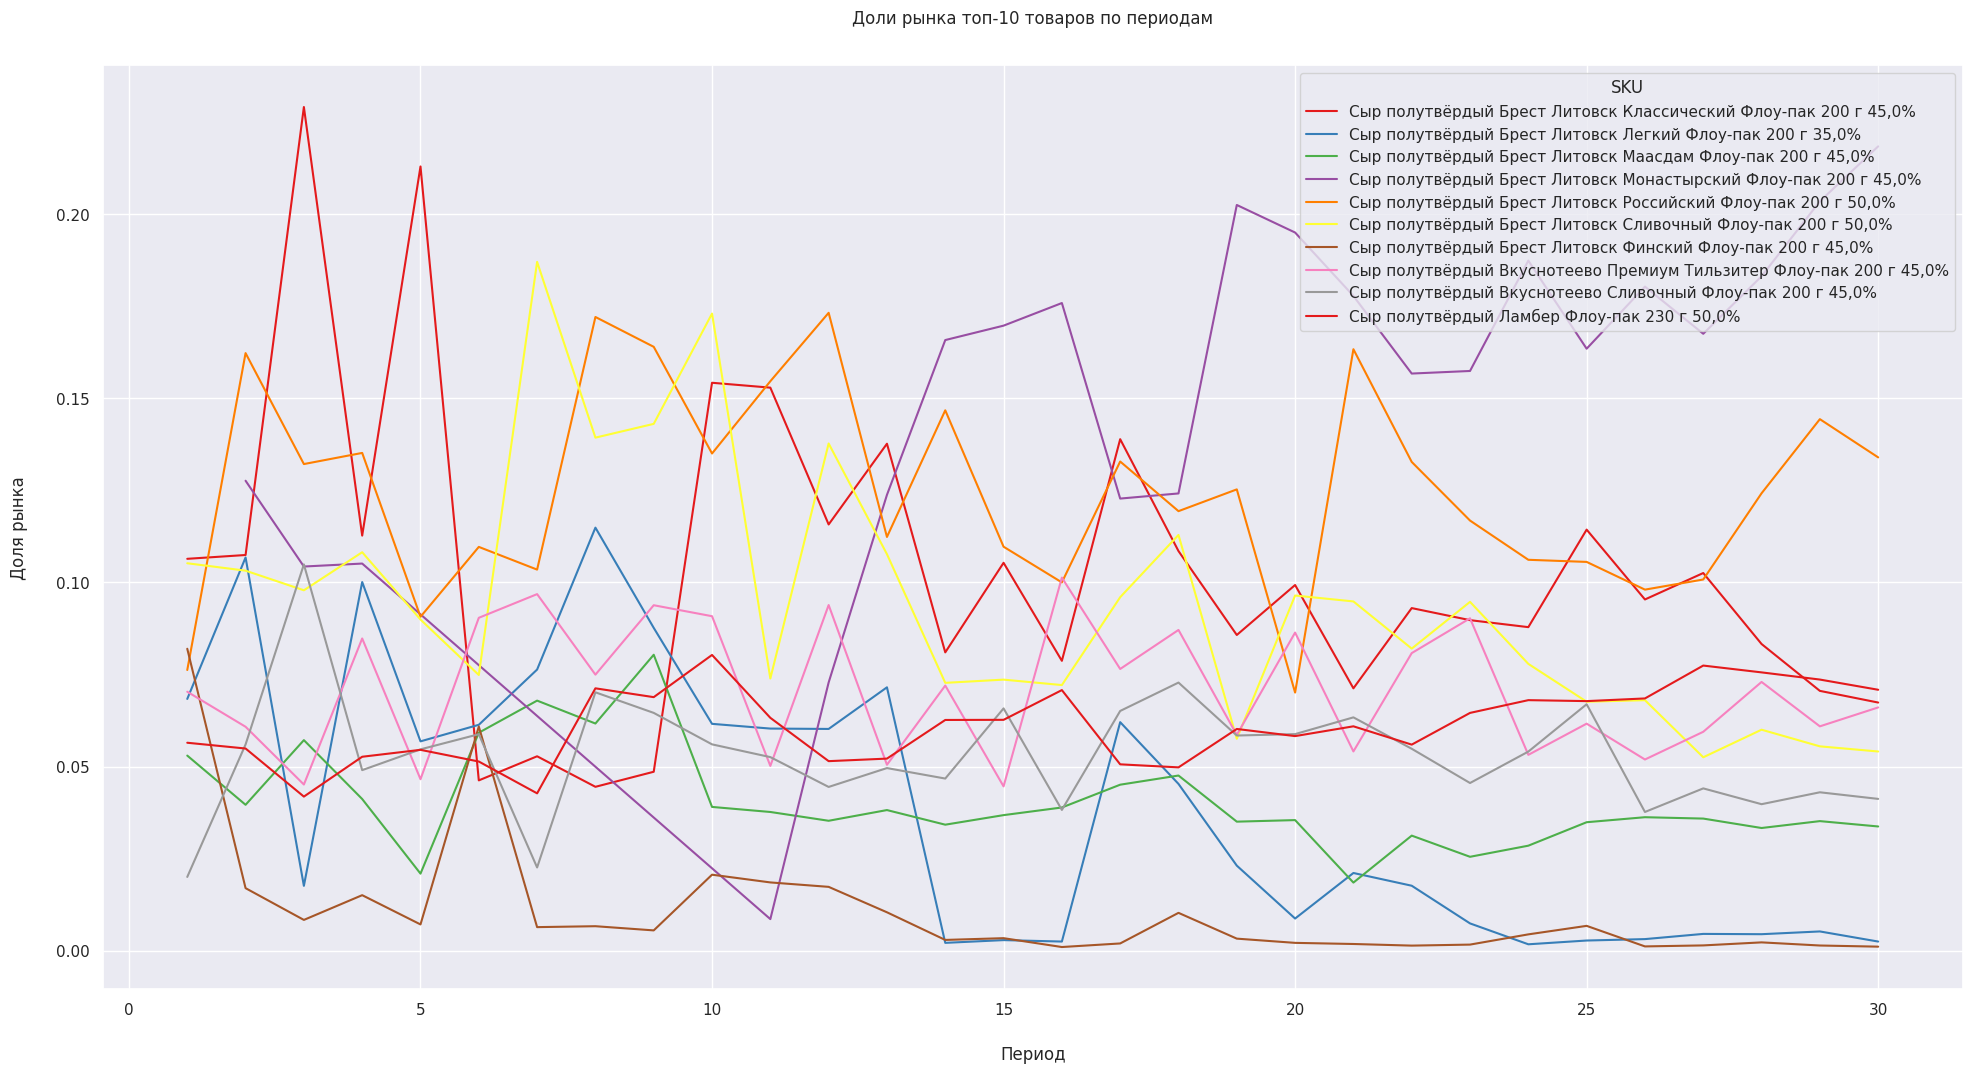

Базовая ску  Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%


100% (11 of 11) |########################| Elapsed Time: 0:00:13 Time:  0:00:13


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    188.6661
Link Function:                     IdentityLink Log Likelihood:                                 -4035.8223
Number of Samples:                         2055 AIC:                                             8450.9769
                                                AICc:                                            8489.7713
                                                GCV:                                                2.8009
                                                Scale:                                              2.3422
                                                Pseudo R-Squared:                                    0.757
Feature Function                  Lam

<ipython-input-4-20bccdcf8973>:304: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


if 'data' in locals():
    del data
data= df_org.copy()
# df_org_top_25 = df_org.groupby(['Sku_name'])['SALES_VOL'].sum()
# sku_top_25=df_org_top_25.sort_values(ascending=False).head(25)
# df_r = df_org['Sku_name'].apply(lambda x: x in sku_top_25.index.values)
# data = df_org[df_r].copy()
# data
# data.to_excel('цфо_X5.xlsx')
# max_sku =data.sort_values(by="SHARE_VOL",ascending=False).values.tolist()
# Группируем по 'Sku_name' и находим среднее значение 'SHARE_VOL'
grouped = data.groupby('Sku_name')['SHARE_VOL'].mean().reset_index()

# Находим строку с максимальным значением 'SHARE_VOL'
# max_sku = grouped.loc[grouped['SHARE_VOL'].idxmax()]

# # Выводим результат
# print("Название SKU с максимальным средним SHARE_VOL:")
# print(max_sku['Sku_name'])
# print("Максимальное среднее SHARE_VOL:")
# print(max_sku['SHARE_VOL'])

if 2024 in data['Year'].unique().tolist():
  year_search=2024

else:
  year_search=2023

# del model_data
# del prediction_data

sns.set(style='darkgrid')

# Переименуем столбцы для удобства
data.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed'
}, inplace=True)

# new_share_vol = pd.DataFrame()
# new_share_vol['sales_vol_t'] = data.groupby('SKU')['sales_volume'].transform('sum')
# new_share_vol['sss']=new_share_vol['sales_vol_t']/data['sales_volume'].sum()
# # new_share_vol['sss'].sum()
# data['market_share_observed']=new_share_vol['sss'].values
# print(data)
# 22/0

# Создаем переменную 'period' на основе года и месяца
data['period'] = data['year'].astype(str) + '_' + data['month'].astype(str)
# Присваиваем уникальный номер каждому периоду
data['period'] = data['period'].astype('category').cat.codes + 1
# Функция для извлечения веса из строки
def extract_weight(package_info):
    import re
    match = re.search(r'(\d+)\s*г', package_info)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Применение функции к столбцу 'Package_Info'
data['Package_Weight'] = data['Package_Info'].apply(extract_weight)
# # Вычисляем среднюю цену по всем SKU
# mean_price = data['price_per_unit'].mean()
# # Вычисляем индекс цены относительно средней цены
# data['price_index'] = data['price_per_unit'] / mean_price

# price_median = data['price_per_unit'].median()
# data['price_index'] = data['price_per_unit'] / price_median

# promo_share_median = data['promo_share'].median()
# data['promo_share_index'] = data['promo_share'] / promo_share_median

# # Вычисляем квадрат индекса цены
# # data['price_index_sq'] = data['price_index'] ** 2


# bins = pd.cut(data['price_index'], bins=10)

# # Группируем по бинам и суммируем значение sales_volume
# sum_sales_vol= data.groupby(bins)['sales_volume'].sum()
# mean_price = data.groupby(bins)['price_index'].mean()
# print(mean_price,'fffff')

# data['price_index_sq']=get_boost_feature_3(X=mean_price,y=sum_sales_vol,target=data['price_index'],target_1=data['sales_volume'])

# # Разбиваем данные по 20 интервалам (бинам) на основе price_index
# bins_promo_share = pd.cut(data['promo_share_index'], bins=10)

# # Группируем по бинам и суммируем значение sales_volume
# sum_sales_vol= data.groupby(bins_promo_share)['sales_volume'].sum()
# mean_promo_share = data.groupby(bins_promo_share)['promo_share_index'].mean()
# print(mean_promo_share,'qqqq')

# data['promo_share_index_sq']=get_boost_feature_3(X=mean_promo_share,y=sum_sales_vol,target=data['promo_share_index'],target_1=data['sales_volume'])


res_data = data.copy()
# Предполагая, что у вас есть DataFrame sku_df с колонкой 'Brand'

# original_data = data.copy()

# data_test =data[data['year']>=2024].copy()
# data =data[data['year']<2024].copy()

# Заполняем пропущенные значения или удаляем строки с пропущенными значениями
data.dropna(inplace=True)

# Вычисляем общий объем продаж в каждом периоде
# data['total_sales_volume'] = data.groupby('period')['sales_volume'].transform('sum')

# Вычисляем долю рынка для каждого SKU в каждом периоде
# data['market_share'] = data['sales_volume'] / data['total_sales_volume']
# base_sku = 'Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%'

# base_sku ='Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%'
# # base_sku =max_sku[0][2]
# base_sku =max_sku['Sku_name']

# # Выбираем только топ-10 SKU по максимальной доле рынка
plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['market_share_observed'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='market_share_observed', hue='SKU', palette='Set1')
plt.title('Доли рынка топ-10 товаров по периодам', pad=30)  # Сдвиг заголовка
plt.xlabel('Период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('Доля рынка', labelpad=20)  #
plt.show()

base_sku = 'Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%'
# # base_sku='Сыр полутвёрдый Сыробогатов Королевский стандарт Топленое молоко Флоу-пак 180 г 40,0%'
print(f'Базовая ску  {base_sku}')

if base_sku not in data['SKU'].unique():
    raise ValueError(f"Базовый SKU '{base_sku}' не найден в данных.")

data_categor = pd.DataFrame()
# Преобразуем категориальную переменную в числовую
for cat_i in ['Package_Info', 'Cheese_Type', 'Brand','SKU']:
    data_categor[cat_i]=pd.Categorical(data[cat_i]).codes
data_categor.rename(columns={'SKU':'SKU_cat'},inplace=True)

data_del= data.drop(['Package_Info', 'Cheese_Type', 'Brand'],axis=1)

data = data_del.join(data_categor).copy()



# # Данные базового SKU
base_data = data[data['SKU'] == base_sku][['period', 'sales_volume']].rename(columns={'sales_volume': 'base_sales_volume'})

characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand', 'SKU_cat']

base_data_only = data[data['SKU'] == base_sku][['period'] + characteristics].copy()

# Объединяем с основной таблицей
data = pd.merge(data, base_data, on='period', how='left')

# Удаляем строки, где нет данных базового SKU
data.dropna(subset=['base_sales_volume'], inplace=True)
data['log_share_ratio'] = np.log(data['sales_volume'] / data['base_sales_volume'])
data = data[data['SKU'] != base_sku]
data.to_excel('12q.xlsx')
# Вычисляем общий объем продаж в каждом периоде
data['total_sales_volume'] = data.groupby('period')['sales_volume'].transform('sum')

# Вычисляем долю рынка для каждого SKU в каждом периоде
data['1_market_share'] = data['sales_volume'] / data['total_sales_volume']

ert = data.copy()
# # Кодируем 'Cheese_Type' и 'Brand' с помощью One-Hot Encoding
# data = pd.get_dummies(data, columns=['Cheese_Type', 'Brand'], drop_first=True)
# characteristics = [
#     'price_index', 'price_index_sq', 'promo_share_index','promo_share_index_sq','Package_Weight', 'ASC'
# ] + \
# [data_col for data_col in data.columns if data_col.startswith('Cheese_Type_') or data_col.startswith('Brand_')]
# # Кодируем категориальные переменные (Cheese_Type и Brand)
# # df['Cheese_Type'] = df['Articul8']  # Используем 'Articul8' как тип сыра
# # df = pd.get_dummies(df, columns=['Cheese_Type', 'Brand'], drop_first=True)
# # # Преобразование bool переменных в int (0 или 1)
# for col in data.columns:
#     if data[col].dtype == bool:
#         data[col] = data[col].astype(int)



# characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand']

data_cat=data.copy()

# # Преобразуем категориальную переменную в числовую
# for cat_i in ['Package_Info', 'Cheese_Type', 'Brand']:
#     data_cat[cat_i]=pd.Categorical(data[cat_i]).codes

# Данные характеристик базового SKU
# base_characteristics = data_cat[data_cat['SKU'] == base_sku][['period'] + characteristics]

base_characteristics = base_data_only.rename(columns=lambda x: 'base_' + x if x != 'period' else x)

# Объединяем базовые характеристики с основной таблицей
data = pd.merge(data_cat, base_characteristics, on='period', how='left', suffixes=('', '_base'))

# Вычисляем разности характеристик
for char in characteristics:
    data['delta_' + char] = data[char] - data['base_' + char]


# from sklearn.preprocessing import MinMaxScaler
data.to_excel('1q.xlsx')


data_test =data[data['year']<=2025].copy()
data =data[data['year']<=2025].copy()
# Установка случайного seed для воспроизводимости
# np.random.seed(42)

# # Случайное перемешивание индексов DataFrame
# indices = np.random.permutation(data.index)



# # Разделение индексов на тренировочные и тестовые
# split_point = int(0.8 * len(data))  # 80% тренировочных данных, 20% тестовых
# train_indices = indices[:split_point]


# # Разделение DataFrame на тренировочные и тестовые данные
# data_train = data.loc[train_indices]

# data_test = data[~data.index.isin(data_train.index)]
# data = data_train.copy()

# model_data = data[data['SKU'] != base_sku].copy()


# X_columns = ['delta_' + char for char in characteristics]

y = data['log_share_ratio']
X =  data[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]
y.to_excel('q4.xlsx')

# # Преобразуем категориальную переменную в числовую
# for cat_i in ['delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']:
#     X[cat_i]=pd.Categorical(X[cat_i]).codes

from sklearn.preprocessing import StandardScaler
# # # scaler = MinMaxScaler()
scaler = StandardScaler()

# # Applying normalization to the selected columns
normalized_data = pd.DataFrame(scaler.fit_transform(X[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'])
del_data = X.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'],axis=1).reset_index(drop=True)
X=del_data.join(normalized_data)
# print(X)
# 22/0

from pygam import LinearGAM, s, f
X.to_excel('q3.xlsx')
gam = LinearGAM(s(0)+s(1)+f(2) + f(3) + f(4)+f(5)).fit(X, y)
# gam = LinearGAM(f(0) + f(1) + f(2)+s(3)+s(4)).fit(X, y)
gam.gridsearch(X, y)

# Кросс-валидация для подбора гиперпараметров
# lam_values = np.logspace(-3, 3, 11)
# gam = LinearGAM(f(0) + f(1) + f(2) + f(3) + s(4)).gridsearch(X, y, lam=lam_values)




# Прогнозируем систематическую утилиту
data['V'] = gam.predict(X)
data.loc[data['SKU'] == base_sku, 'V'] = 0
# Обратное преобразование логарифмического отношения к реальным значениям продаж
data['pred_market_share'] = np.exp(data['V']) * data['base_sales_volume']


# Устанавливаем V = 0 для базовой SKU
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# data['exp_V'] = np.exp(data['V'])

# data = data.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)

# data['pred_market_share']=data
data.to_excel('2q.xlsx')
# y_pred = data['pred_market_share']
# yy=data['market_share_observed']
# Визуализация
gam.summary()
# Коэффициент детерминации (R²)
# r2 = gam.score(X, y)
# print(f'R²: {r2:.3f}')
# from sklearn.metrics import mean_squared_error

# # Рассчитываем MSE
# mse = mean_squared_error(y, data)
# print(f'MSE: {mse:.5f}')
# import matplotlib.pyplot as plt

# # Визуализация предсказанных и реальных значений
# plt.scatter(yy, y_pred)
# plt.xlabel('Реальные значения')
# plt.ylabel('Предсказанные значения')
# plt.title('Предсказанные vs Реальные значения')
# plt.show()

# # Визуализация остатков (errors)
# residuals = yy - y_pred
# plt.scatter(y_pred, residuals)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Предсказанные значения')
# plt.ylabel('Остатки')
# plt.title('Остатки vs Предсказанные значения')
# plt.show()



# # Y.to_excel('Y.xlsx')
# variables = X_columns.copy()
# iteration = 1

# while True:
#     X = model_data[variables]
#     # X = sm.add_constant(X)
#     model = sm.OLS(Y, X).fit()
#     # print(model.summary())
#     # if [i for i in model.pvalues.index if i=='const']:
#     # if model.pvalues.index[0]=='const':
#       # print('fffff')
#       # pvalues = model.pvalues.drop('const')
#     # else:

#     #   pvalues = model.pvalues
#     pvalues = model.pvalues

#     max_pvalue = pvalues.max()
#     if max_pvalue > 0.05:
#         variable_to_remove = pvalues.idxmax()
#         print(f"Итерация {iteration}: удаляем '{variable_to_remove}' с p-значением {max_pvalue:.4f}")

#         variables.remove(variable_to_remove)
#         iteration += 1

#     else:
#         print("Все оставшиеся признаки значимы (p < 0.05).")
#         break

# # Выводим результаты финальной модели
# print("\nРезультаты финальной модели:")
# print(model.summary())



# 5: Прогнозирование долей рынка до исключения SKU_5

# prediction_data = data_test.copy()

# prediction_data['market_share'] = prediction_data.groupby('period')['sales_volume'].transform(lambda x: x / x.sum())
# prediction_data = pd.get_dummies(prediction_data, columns=['Cheese_Type', 'Brand'], drop_first=True)

# # Объединяем базовые характеристики с данными
# base_characteristics = data_test[data_test['SKU'] == base_sku][['period'] + ['base_' + char for char in characteristics]]


# prediction_data = pd.merge(prediction_data, base_characteristics, on='period')


# # Убедимся, что все необходимые столбцы присутствуют
# all_columns = set(['delta_' + char for char in characteristics])
# missing_cols = all_columns - set(prediction_data.columns)
# for col in missing_cols:
#     prediction_data[col] = 0.0  # Используем тип float

# # Вычисляем разности характеристик
# for char in characteristics:
#     prediction_data[char] = prediction_data[char].astype(float)
#     prediction_data['base_' + char] = prediction_data['base_' + char].astype(float)
#     prediction_data['delta_' + char] = prediction_data[char] - prediction_data['base_' + char]

# X_pred = prediction_data[variables]

# # X_pred = sm.add_constant(X_pred, has_constant='add')

# # Прогнозируем систематическую утилиту
# prediction_data['V'] = model.predict(X_pred)



# # Устанавливаем V = 0 для базовой SKU
# prediction_data.loc[prediction_data['SKU'] == base_sku, 'V'] = 0
# prediction_data['exp_V'] = np.exp(prediction_data['V'])

# prediction_data = prediction_data.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)

# pred_market_share_before = prediction_data[['period', 'SKU', 'pred_market_share']]
# pred_market_share_before.to_excel('pred_market_share_before.xlsx')

# # Шаг 6: Исключение SKU_5 и прогнозирование долей рынка после исключения

# sku_to_exclude = max_sku[10][2]  # Замените на фактическое название SKU, который хотите исключить
# prediction_data_after = prediction_data[prediction_data['SKU'] != sku_to_exclude].copy()
# prediction_data_after = prediction_data_after.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)

# # Шаг 7: Анализ результатов и визуализация

# comparison = pd.merge(pred_market_share_before, prediction_data_after[['period', 'SKU', 'pred_market_share']], on=['period', 'SKU'], how='outer', suffixes=('_before', '_after'))
# comparison['pred_market_share_after'] = comparison['pred_market_share_after'].fillna(0)
# comparison['market_share_change'] = comparison['pred_market_share_after'] - comparison['pred_market_share_before']
# mean_changes = comparison.groupby('SKU')['market_share_change'].mean().reset_index()
# mean_changes = mean_changes.sort_values('market_share_change', ascending=False)
# print("\nСреднее изменение прогнозируемых долей рынка после исключения SKU_5:")
# print(mean_changes)

# Визуализация изменений долей рынка
# plt.figure(figsize=(12, 6))
# for sku in data['SKU'].unique():
#     sku_data = comparison[comparison['SKU'] == sku]
#     if sku != sku_to_exclude:
#         plt.plot(sku_data['period'], sku_data['market_share_change'], marker='o', label=sku)
#     else:
#         plt.plot(sku_data['period'], -sku_data['pred_market_share_before'], marker='x', linestyle='--', label=sku)
# plt.xlabel('Период')
# plt.ylabel('Изменение прогнозируемой доли рынка')
# plt.title(f'Изменение прогнозируемой доли рынка по SKU после исключения {sku_to_exclude}')
# # plt.legend()
# plt.show()



In [5]:
true_pred =data.groupby('SKU')['pred_market_share'].mean()
true_pred



,pred_market_share
SKU,
"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",4.533642
"Сыр полутвёрдый Casa Margot Эмменталер Флоу-пак 150 г 45,0%",17.676416
"Сыр полутвёрдый Cheese House Pizza Моцарелла Флоу-пак 200 г 40,0%",2411.039909
"Сыр полутвёрдый Cheese House Гауда Флоу-пак 180 г 20,0%",3829.753837
"Сыр полутвёрдый Cheese House Юбилейный Флоу-пак 180 г 45,0%",1526.845414
...,...
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",14859.573425
"Сыр полутвёрдый Эконива Колыбельский Флоу-пак 200 г 45,0%",6811.756258
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",9408.933778


In [22]:
import pandas as pd
sales_vol_pred = pd.DataFrame()
sales_vol_pred['sales_vol_t'] = data.groupby('SKU')['pred_market_share'].sum()
sales_vol_pred['sss']=sales_vol_pred['sales_vol_t']/data['pred_market_share'].sum()
sales_vol_pred['sss'].sum()


0.9999999999999998

In [7]:
# mean_org = pd.DataFrame()
# mean_org['org_market_share'] = data.groupby('SKU')['market_share_observed'].mean()
# mean_org['org_market_share']

In [8]:
mean_org = pd.DataFrame()
mean_org['org_market_share'] = ert.groupby('SKU')['sales_volume'].mean()
mean_org['org_market_share']

,org_market_share
SKU,
"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",24.000000
"Сыр полутвёрдый Casa Margot Эмменталер Флоу-пак 150 г 45,0%",17.657143
"Сыр полутвёрдый Cheese House Pizza Моцарелла Флоу-пак 200 г 40,0%",2322.460000
"Сыр полутвёрдый Cheese House Гауда Флоу-пак 180 г 20,0%",7078.992000
"Сыр полутвёрдый Cheese House Юбилейный Флоу-пак 180 г 45,0%",929.640000
...,...
"Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%",16535.146667
"Сыр полутвёрдый Эконива Колыбельский Флоу-пак 200 г 45,0%",10768.086667
"Сыр полутвёрдый Эконива Тильзитер Флоу-пак 160 г 50,0%",15523.316364


In [9]:
import pandas as pd
sales_vol_true = pd.DataFrame()
sales_vol_true['sales_vol_t'] = ert.groupby('SKU')['sales_volume'].sum()
sales_vol_true['sss']=sales_vol_true['sales_vol_t']/ert['sales_volume'].sum()
sales_vol_true['sss'].sum()




1.0

In [10]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(mean_org['org_market_share'].values - true_pred.to_frame()['pred_market_share'].values) / sum(mean_org['org_market_share'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 661.55
WAPE: 0.18
R²: 0.98
R² Adjusted: 0.98


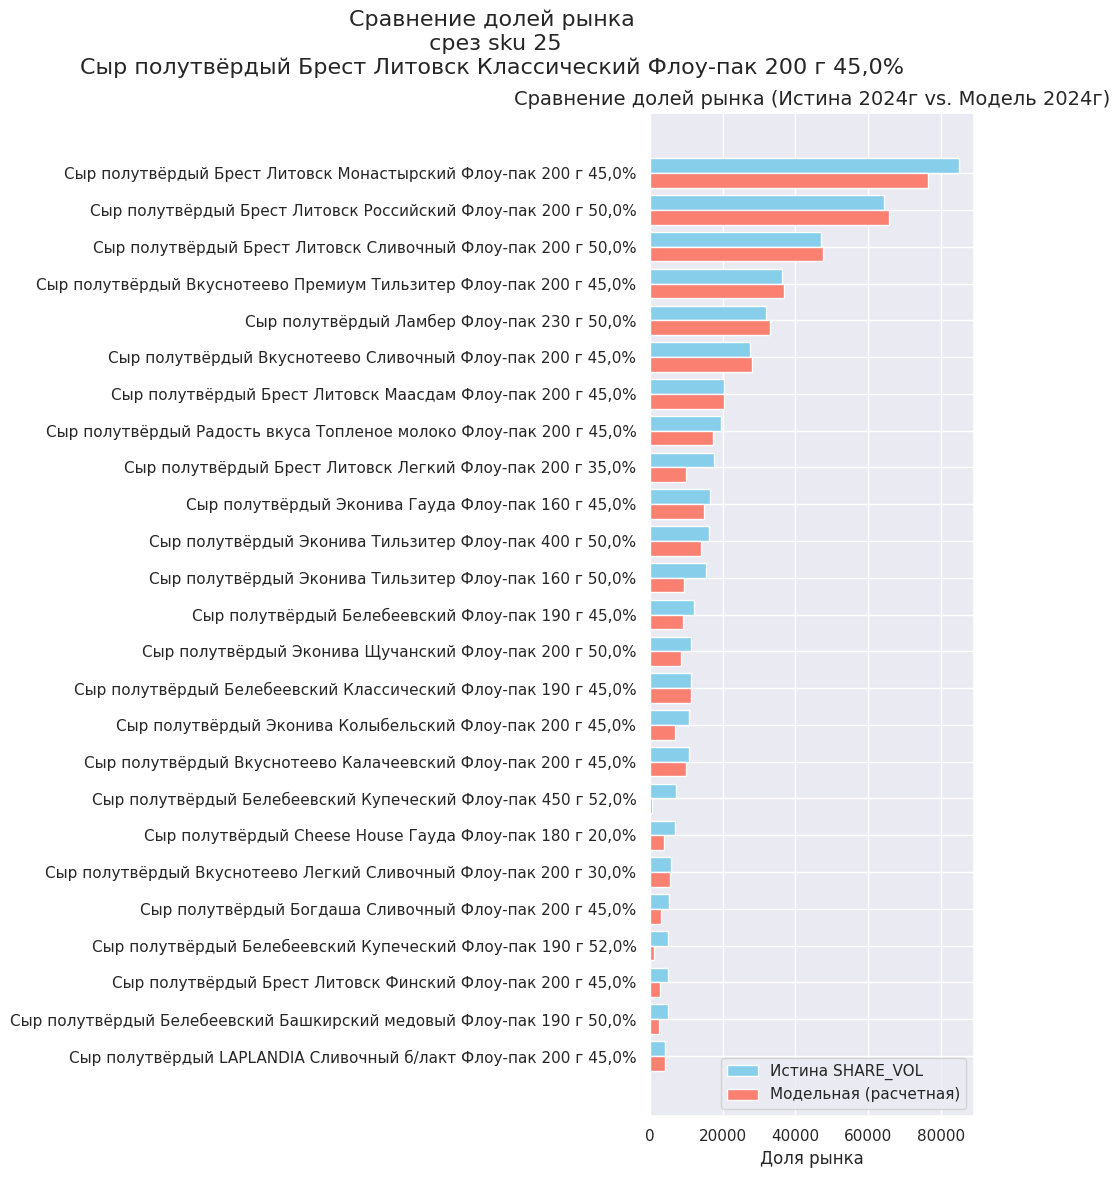

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='Истина SHARE_VOL')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='Модельная (расчетная)')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('Доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = mean_org['org_market_share'].values
sizes_pred = true_pred.to_frame()['pred_market_share'].values
labels_org = mean_org.index.values
top_25=25
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 12))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка (Истина 2024г vs. Модель 2024г)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка\n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


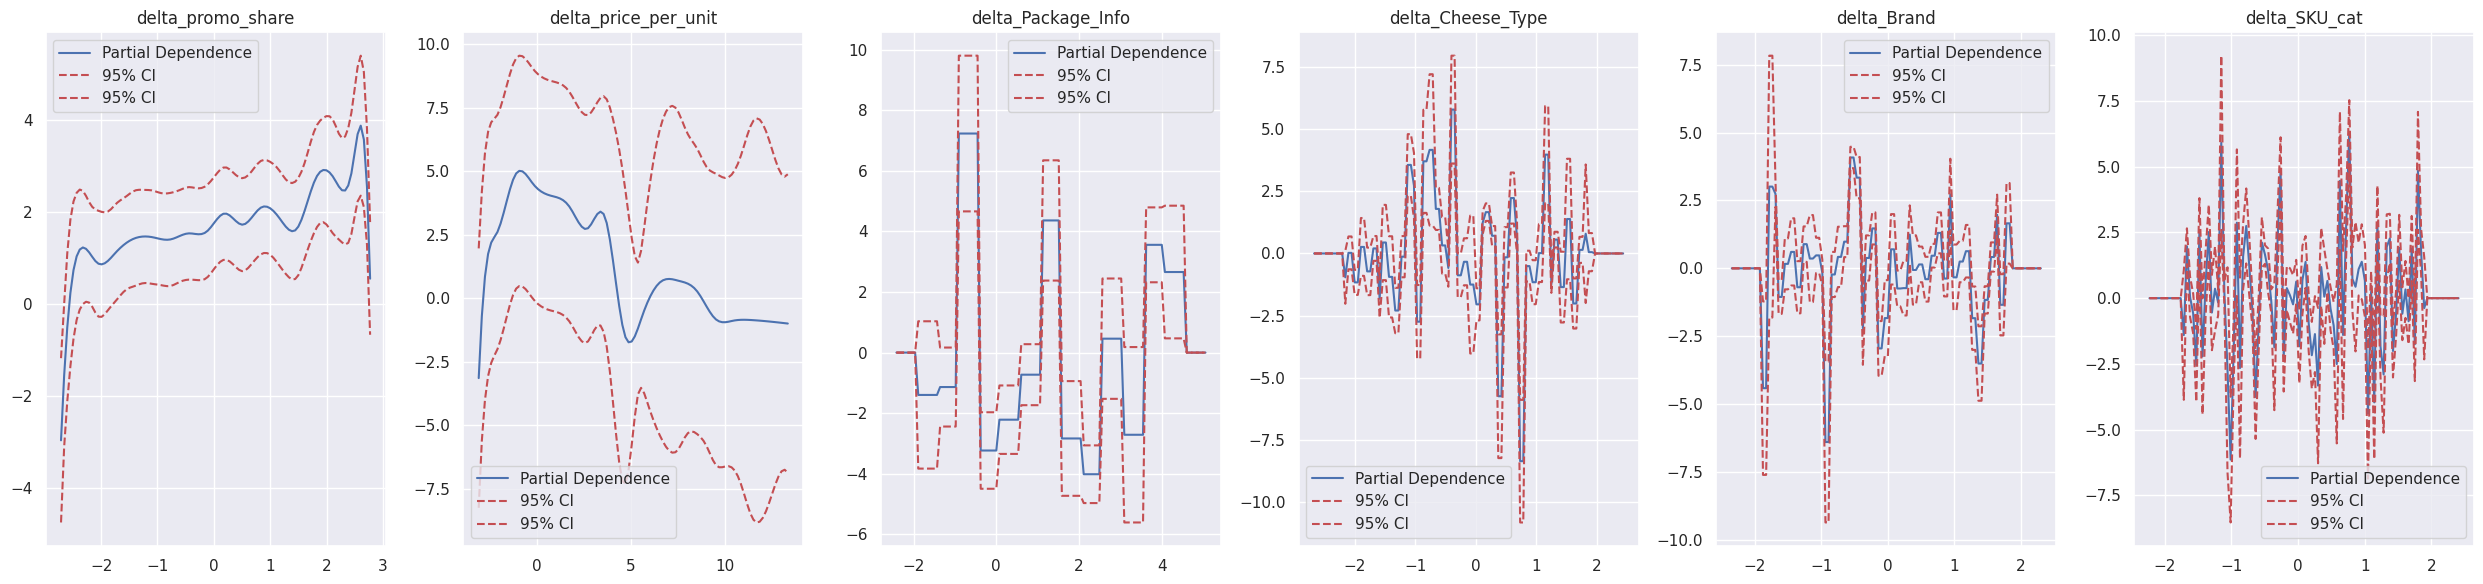

In [12]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

titles = ['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']

# Создание подграфиков с заданным размером фигуры
fig, axs = plt.subplots(1, 6, figsize=(25, 6))  # Ширина 25 дюймов и высота 5 дюймов

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pd = gam.partial_dependence(term=i, X=XX)
    ppd = gam.partial_dependence(term=i, X=XX, width=.95)

    ax.plot(XX[:, i], pd, label='Partial Dependence')
    ax.plot(XX[:, i], ppd[1], c='r', ls='--', label='95% CI')


    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.show()

In [13]:
X.describe()

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand,delta_SKU_cat
count,2.055000e+03,2.055000e+03,2.055000e+03,2.055000e+03,2.055000e+03,2.055000e+03
mean,-1.383052e-17,2.766103e-17,1.383052e-17,1.383052e-17,1.659662e-16,5.532206e-17
std,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00
min,-2.711344e+00,-3.091677e+00,-1.915967e+00,-2.176304e+00,-1.848877e+00,-1.727098e+00
25%,-6.855025e-01,-5.775724e-01,-5.282866e-01,-7.799693e-01,-6.562239e-01,-7.442476e-01
50%,5.283271e-03,-1.306178e-01,-6.572633e-02,7.334626e-02,-3.054435e-01,-1.728232e-01
75%,6.965435e-01,4.154298e-01,-6.572633e-02,8.490877e-01,7.468976e-01,7.643128e-01
max,2.772642e+00,1.335977e+01,4.559876e+00,1.935126e+00,1.799239e+00,1.907162e+00


<ipython-input-20-397206f0623c>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes_org_sorted = sizes_org[sorted_indices][:top_25]
<ipython-input-20-397206f0623c>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]


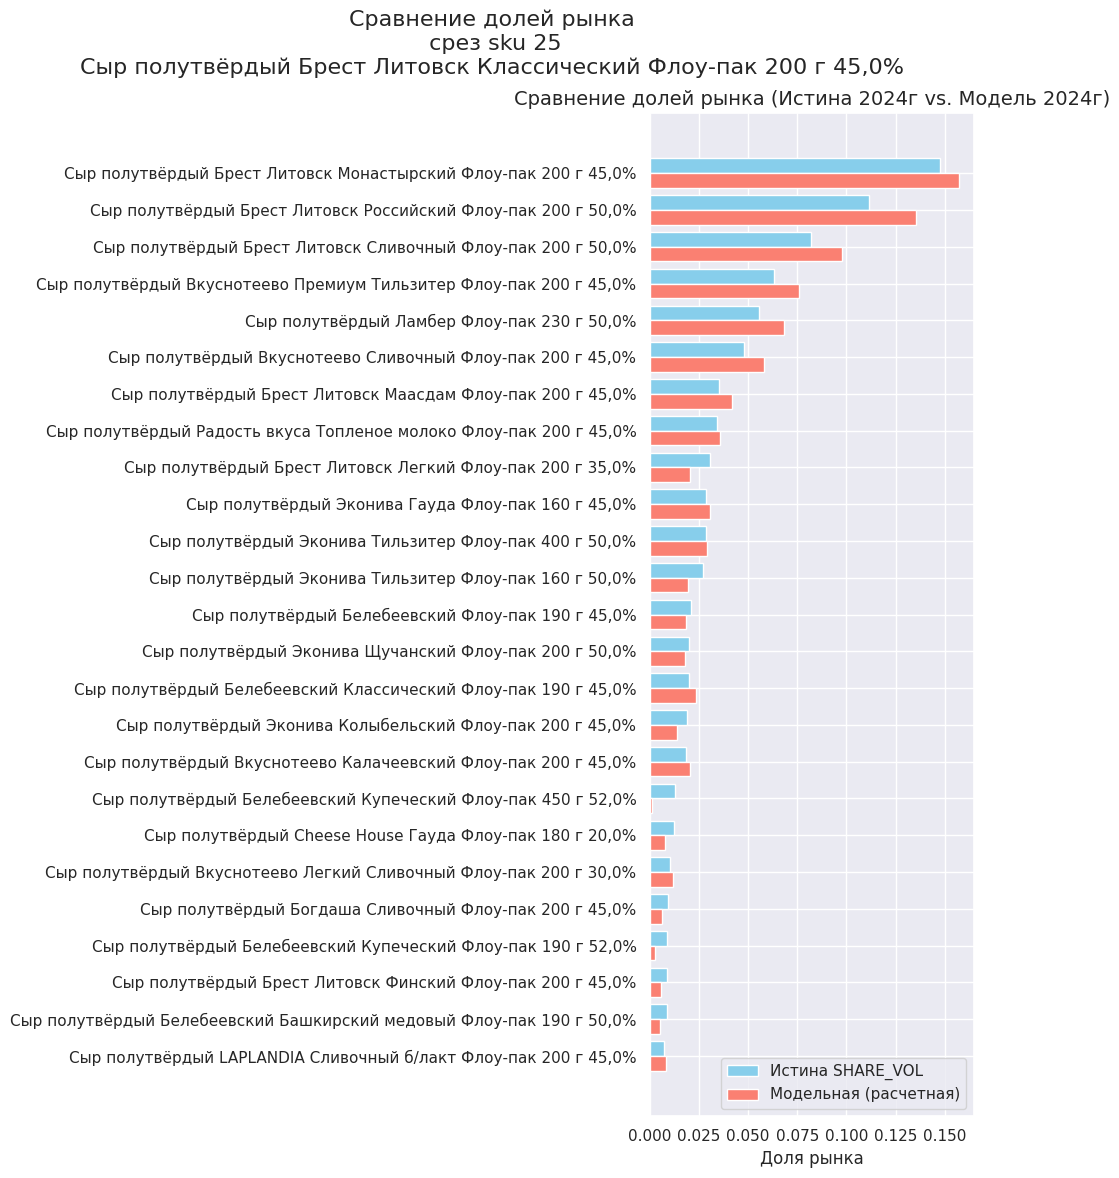

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='Истина SHARE_VOL')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='Модельная (расчетная)')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('Доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org_0 = mean_org.groupby('SKU')['org_market_share'].sum()
sizes_org= sizes_org_0/mean_org['org_market_share'].sum()

sizes_pred_0 = true_pred.to_frame().groupby('SKU')['pred_market_share'].sum()
sizes_pred =sizes_pred_0/true_pred.to_frame()['pred_market_share'].sum()
labels_org = mean_org.index.values
top_25=25
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 12))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка (Истина 2024г vs. Модель 2024г)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка\n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [18]:
sizes_org.sum()

0.9999999999999999

In [19]:
sizes_pred.sum()

1.0